<a href="https://colab.research.google.com/github/AMEERKOTTA/hands_on_machine_learning_with_sklearn_keras_and_tensorflow/blob/main/Intro%20to%20Tensorflow%20for%20Deep%20Learning/07-Time%20Series%20Forecasting/02_naive_forecasting_to_get_a_baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NAIVE FORECASTING METHOD**



> **NAIVE FORECASTING : - Take the Last Value and Assume that the Next Value will be the Same.**

+ Measure the Perfomance of the Naive Forecasting to get the Baseline.

To Measure the Perfomance, we have to Split the Time Series to Training Period, Validation Period, Testing Period.

+ If Time Series consist of Seasonality, then we have to ensure that when Splitting, the splits should contain a whole seasonality.

+ There is another method called Roll Forward Partitioning to Train and Evaluate the Time Series.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## required functions to use.
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)
    
def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
  
def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)
    
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

TREND AND SEASONALITY

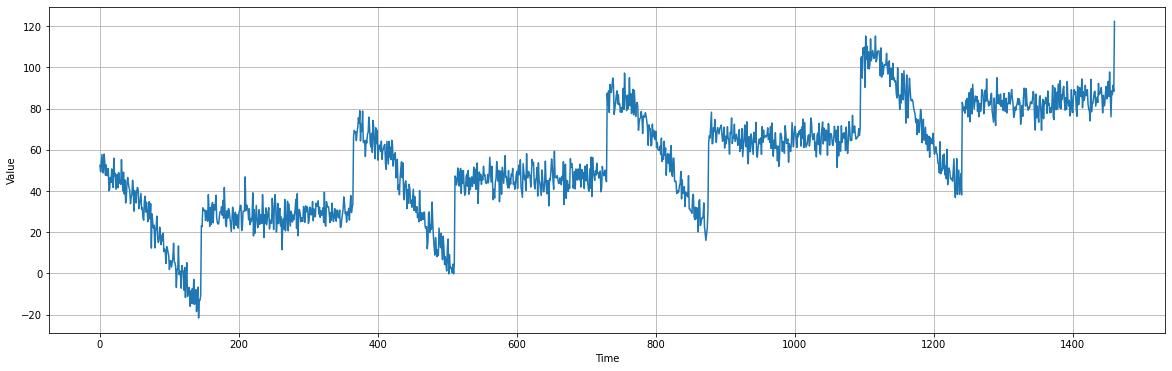

In [4]:
time = np.arange(4 * 365 + 1)

slope = 0.05
baseline = 10
amplitude = 40
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

noise_level = 5
noise = white_noise(time, noise_level, seed=42)

series += noise

plt.figure(figsize=(20, 6))
plot_series(time, series)
plt.show()

DOING THE FORECASTING - NAIVE FORECASTING

+ Split the Series into two Periods.
+ Training Period and Validation Period.
+ Split will be at the time step = 1000

In [11]:
## define the split time = 1000
split_time = 1000
## split the training set period
time_train = time[:1000]
print(time_train.shape)
x_train = series[:1000]
print(x_train.shape)
## split the validation set period
time_valid = time[1000:]
print(time_valid.shape)
x_valid = series[1000:]
print(x_valid.shape)

(1000,)
(1000,)
(461,)
(461,)


In [13]:
## doing the naive forecasting
naive_forecast = series[split_time - 1 : -1]
print(naive_forecast.shape)

(461,)


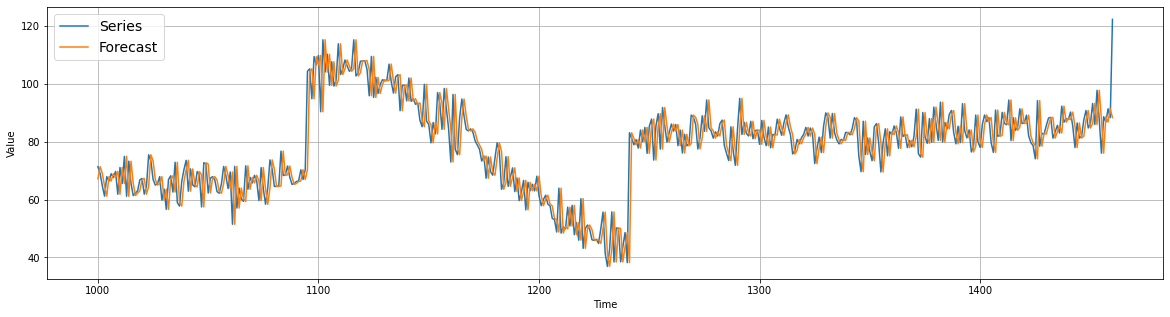

In [14]:
## plot the niave forecasting output
plt.figure(figsize = (20,5))
plot_series(time_valid, x_valid, label = "Series")
plot_series(time_valid, naive_forecast, label = "Forecast")

This seems exactly the same. Try to Zoom in Little Bit.

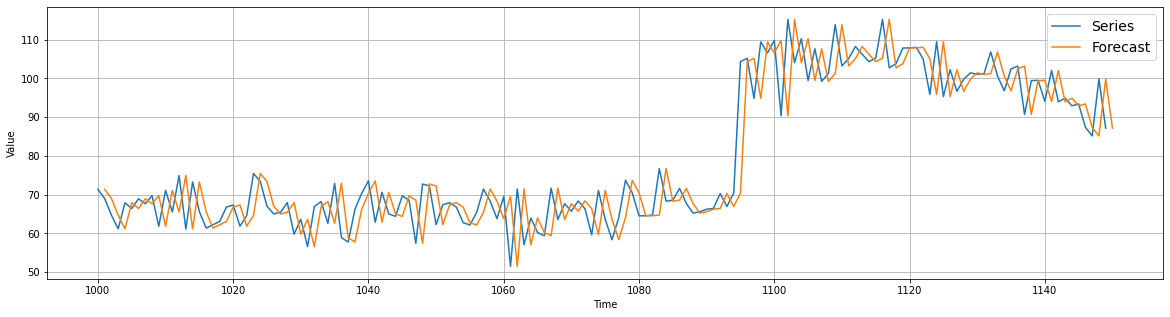

In [15]:
## plot the niave forecasting output zoomed in
## add start and end in plot series function.
## start = 0, end = 150 for Series.
## start = 1, and end = 151 for Forecast.
plt.figure(figsize = (20,5))
plot_series(time_valid, x_valid, start=0, end=150, label="Series")
plot_series(time_valid, naive_forecast, start=1, end=151, label="Forecast")

Now we can see the Prediction is Exactly the Same.But one step to the right into the Forecasting.

+ naive forecast lags 1 step behind the time series

EVALUATE THE MODEL BY MEAN ABSOLUTE ERROR

compute the mean absolute error between the forecasts and the predictions in the validation period

In [19]:
## errors is actual - predicted 
errors = naive_forecast - x_valid
print(errors.shape)
## take the absolute errors
abs_errors = np.abs(errors)
print(abs_errors.shape)
## calculate the mae (mean of the absolute errors) of the errors
mae = abs_errors.mean()
print(mae)

(461,)
(461,)
5.9379085153216735


This is the Baseline that We have to Forecast using the Naive Forecasting Method.

***
